<a href="https://colab.research.google.com/github/1503-ng/Curso-de-Python/blob/master/estudo_corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/patient.csv')
df.head()


,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [0]:
df = df.rename(columns={
    'patient_id':'paciente_id',
     'sex':'sexo',
     'birth_year':'ano_que_nasceu',
     'country':'pais',
     'region': 'regiao',
      'disease':'doenca',
      'group':'grupo',
      'infection_reason':'causa_da_infeccao',
      'infection_order':'ordem_de_infeccao',
      'infected_by':'infectado_por',
      'contact_number':'numero_de_contato',
      'confirmed_date':'data_de_confirmacao',
      'released_date':'data_de_liberacao',
      'deceased_date':'data_de_falecimento',
      'state':'estado'})
df

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated


In [0]:
#pessoas do sexo feminino e masculino registradas = 679 #

df[(df.sexo == 'female') | (df.sexo == 'male')]
sexo = df[(df.sexo == 'female') | (df.sexo == 'male')]
sexo




,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,5581,male,2013.0,Korea,capital area,NaN,NaN,contact with patient,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5766,5767,male,1938.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
5767,5768,female,1935.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
6284,6285,female,1929.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,2020-03-04,deceased


In [0]:
##homens registrados = 286#

df[df.sexo == 'male']
masculino = df[df.sexo == 'male']
masculino



,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5459,5460,male,1940.0,Korea,Gyeongsangbuk-do,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-04,NaN,2020-03-05,deceased
5533,5534,male,1974.0,Korea,Jeju-do,NaN,NaN,visit to Daegu,74.0,NaN,74.0,2020-03-04,NaN,NaN,isolated
5580,5581,male,2013.0,Korea,capital area,NaN,NaN,contact with patient,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5766,5767,male,1938.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased


In [0]:
df[df.sexo == 'female']
feminino = df[df.sexo == 'female']
feminino

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released
8,9,female,1992.0,Korea,capital area,NaN,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released
9,10,female,1966.0,Korea,capital area,NaN,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released
13,14,female,1980.0,China,capital area,NaN,NaN,contact with patient,3.0,12.0,3.0,2020-02-02,2020-02-18,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,4892,female,2009.0,Korea,capital area,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5025,5026,female,1973.0,Korea,capital area,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5172,5173,female,1974.0,Korea,capital area,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5767,5768,female,1935.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased


In [0]:
#quantas pessoas possuem sexo indefinido? 7190 #

df[(df.sexo != 'female') != (df.sexo != 'male')]
sexo_indefinido = df[(df.sexo != 'female') & (df.sexo != 'male')]
sexo_indefinido


,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
91,92,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated
92,93,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated
93,94,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated
94,95,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated
95,96,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,isolated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df.describe(include='all')

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
count,7869.000000,679,666.000000,7869,437,28.0,86,154,36.000000,70.000000,53.000000,7869,56,36,7869
unique,NaN,2,NaN,3,14,NaN,4,14,NaN,NaN,NaN,37,21,16,3
top,NaN,female,NaN,Korea,capital area,NaN,Shincheonji Church,contact with patient,NaN,NaN,NaN,2020-03-01,2020-03-04,2020-03-05,isolated
freq,NaN,393,NaN,7860,191,NaN,58,76,NaN,NaN,NaN,1062,11,6,7777
mean,3935.000000,NaN,1974.271772,NaN,NaN,1.0,NaN,NaN,4.277778,379.000000,67.849057,NaN,NaN,NaN,NaN
std,2271.728967,NaN,17.423250,NaN,NaN,0.0,NaN,NaN,12.032364,540.247528,177.723575,NaN,NaN,NaN,NaN
min,1.000000,NaN,1929.000000,NaN,NaN,1.0,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
25%,1968.000000,NaN,1962.000000,NaN,NaN,1.0,NaN,NaN,1.000000,29.250000,3.000000,NaN,NaN,NaN,NaN
50%,3935.000000,NaN,1974.000000,NaN,NaN,1.0,NaN,NaN,2.000000,126.000000,17.000000,NaN,NaN,NaN,NaN
75%,5902.000000,NaN,1990.000000,NaN,NaN,1.0,NaN,NaN,3.000000,563.250000,45.000000,NaN,NaN,NaN,NaN


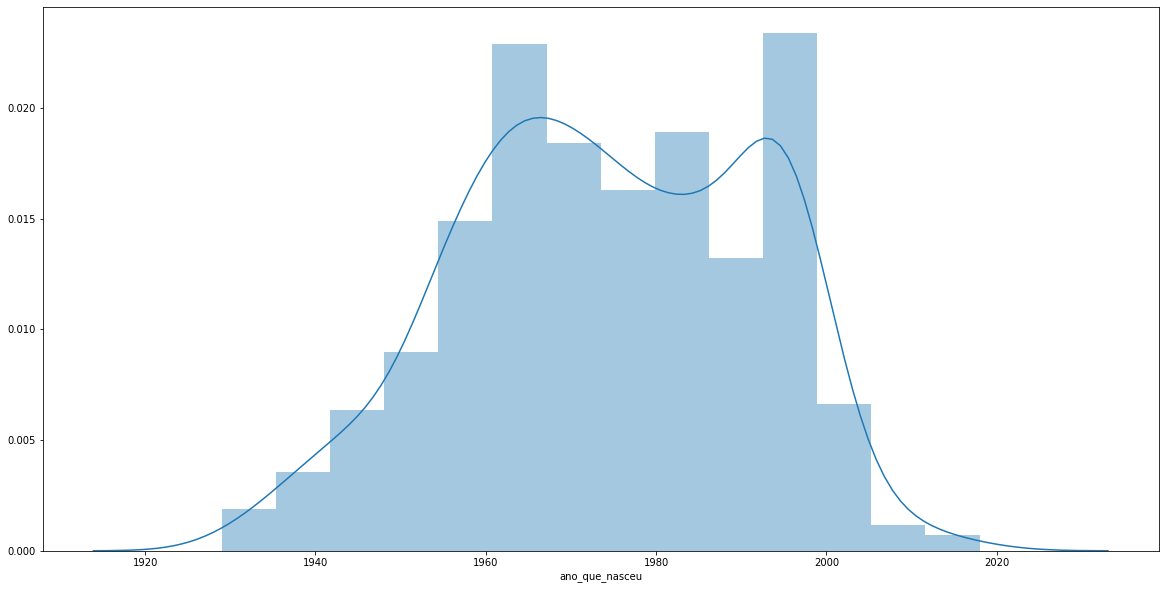

In [0]:
sns.distplot(df['ano_que_nasceu'])

In [0]:
df[df.pais == 'Korea']
coreia= df[df.pais == 'Korea' ]
coreia

,paciente_id,sexo,ano_que_nasceu,pais,regiao,doenca,grupo,causa_da_infeccao,ordem_de_infeccao,infectado_por,numero_de_contato,data_de_confirmacao,data_de_liberacao,data_de_falecimento,estado
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,7865,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7865,7866,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7866,7867,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
7867,7868,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11,NaN,NaN,isolated
